# IV deo
 #### Učitaćemo obrađen dataset iz 2. notebooka. Izvršićemo nekoliko analiza koje ćemo zatim prikazati pomoću biblioteka za vizuelizaciju kao što su seaborn i matplotlib.

In [16]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.pyplot import title

dfr = pd.read_csv('../data/brit_sredjen.csv')
bpa = dfr.groupby('Performer')['loudness'].mean()
bpa = bpa.sort_values(ascending=False)
bpa.head(10)


Performer
Dave Dee, Dozy, Beaky, Mick & Tich        -4.946167
The Kinks feat: Shel Talmy                -5.143000
The Who                                   -6.663571
The Animals                               -6.774857
feat: Manfred Mann                        -6.800250
Spencer Davis / The Spencer Davis Group   -7.067333
The Moody Blues                           -7.366333
The Kinks                                 -7.560304
The Zombies                               -7.659750
Herman's Hermits                          -7.799000
Name: loudness, dtype: float64

 #### Najpre ćemo grupisati redove po izvođačima, i izračunati prosečnu bučnost pesama za svakog pojedinačnog izvođača. Rezultate ćemo prikazati preko lineplot grafika.

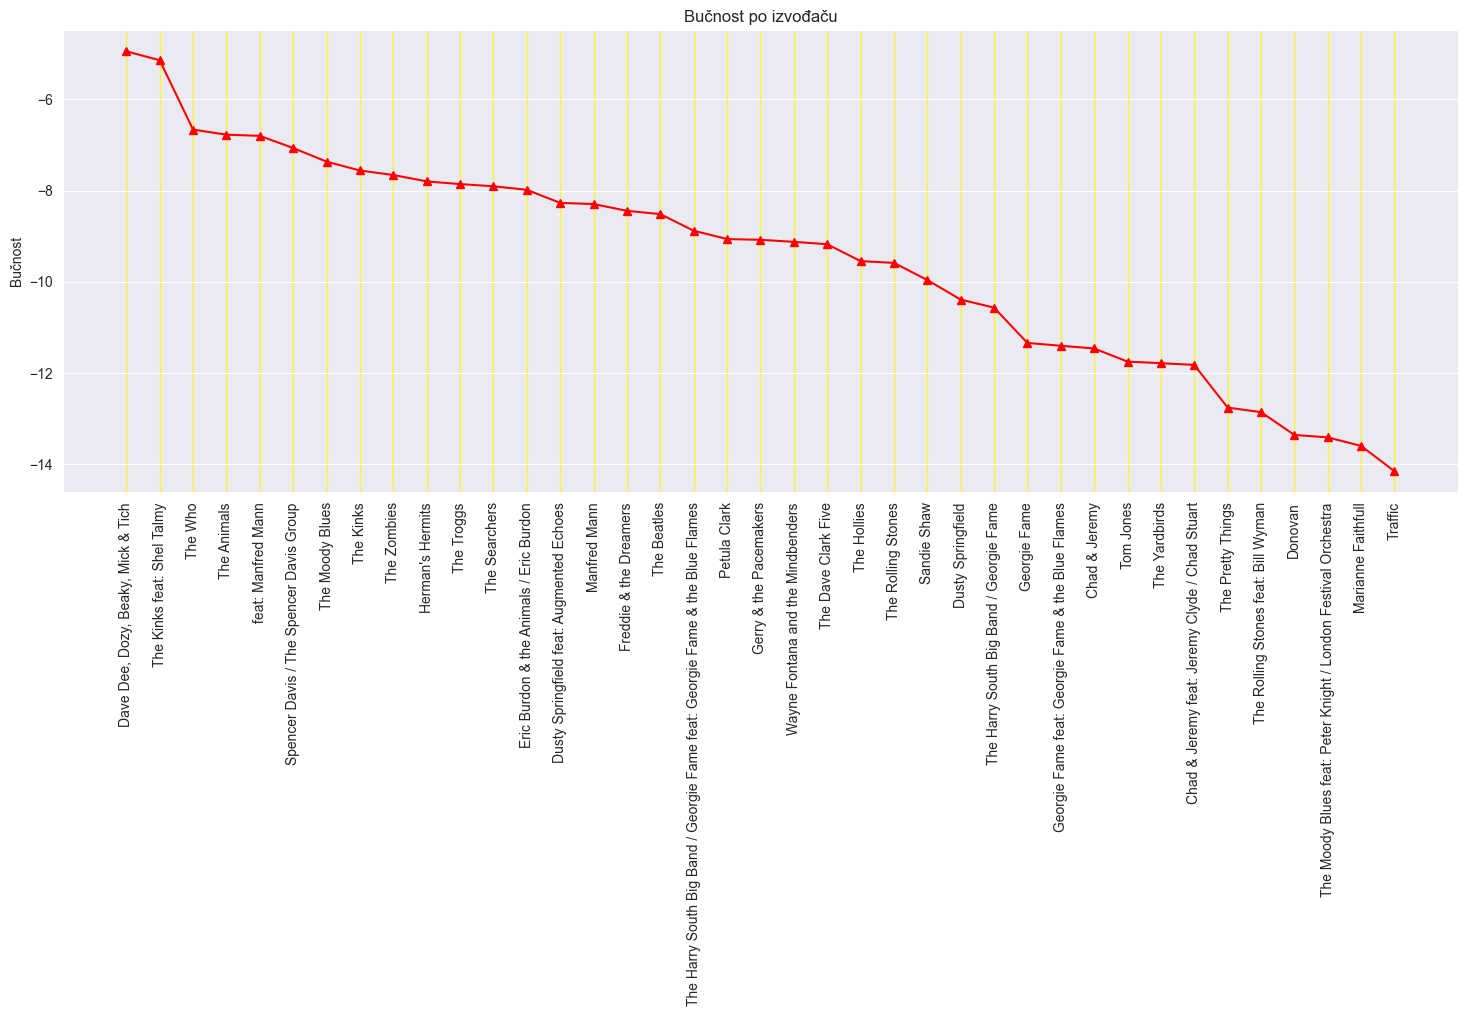

In [47]:
fg,ax = plt.subplots(figsize=(18,6))
ax.plot(bpa.index,bpa.values, color='red',marker='^')
ax.set_title('Bučnost po izvođaču')
ax.set_ylabel('Bučnost')
ax.tick_params(axis='x',labelrotation=90)
ax.grid(visible=True, axis='x', which='major', color='yellow')
plt.show()

#### Prikazaćemo prosečno trajanje pesama po izvođaču. Pre samog grupisanja neophodno je object kolonu `Song.duration` prebaciti u numerički tip.

In [19]:
def convert_to_seconds(duration):
    minutes, seconds = map(int, duration.split(':'))
    return minutes * 60 + seconds
dfr['Trajanje'] = dfr['Song.duration'].apply(convert_to_seconds)
tpi = dfr.groupby('Performer')['Trajanje'].mean()
tpi = tpi.sort_values(ascending=False)
tpi.head(10)


Performer
The Moody Blues feat: Peter Knight / London Festival Orchestra    316.000000
Eric Burdon & the Animals / Eric Burdon                           234.400000
Traffic                                                           208.000000
Chad & Jeremy feat: Jeremy Clyde / Chad Stuart                    199.800000
The Animals                                                       197.000000
The Rolling Stones feat: Bill Wyman                               195.000000
Donovan                                                           191.818182
Manfred Mann                                                      190.857143
The Rolling Stones                                                189.716049
The Who                                                           181.428571
Name: Trajanje, dtype: float64

#### Vizualizovaćemo ove podatke preko barplota. Kako nam se ne bi preklapali nazivi albuma na x osi rotiraćemo ih za 90 kako bi se prikazivali vertikalno.

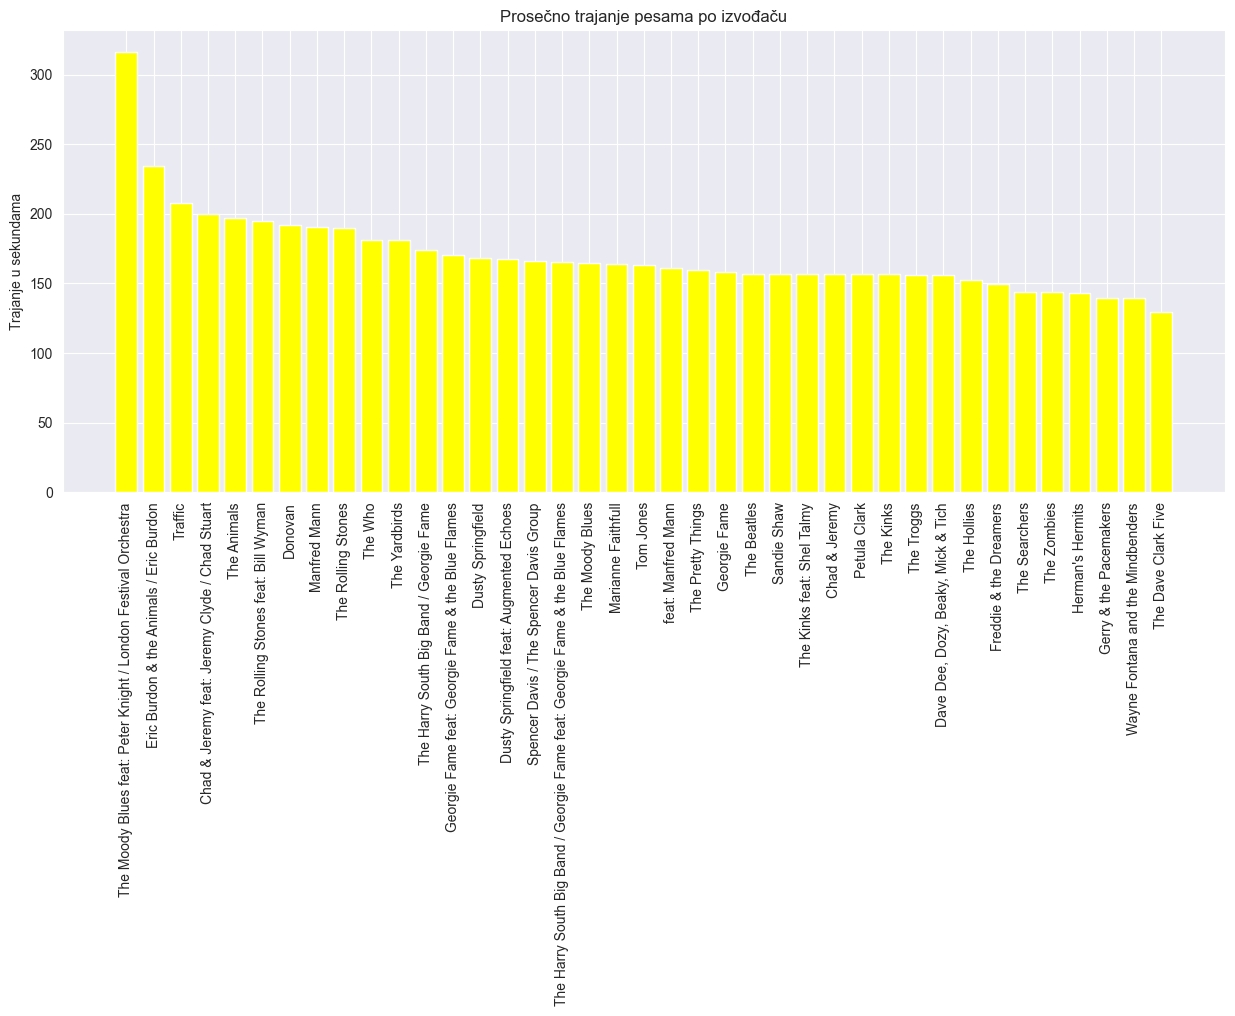

In [43]:
_,ose = plt.subplots(figsize=(15,6))
ose.bar(tpi.index,tpi.values, color='yellow')
ose.set_title('Prosečno trajanje pesama po izvođaču')
ose.set_ylabel('Trajanje u sekundama')
ose.tick_params(axis='x',labelrotation=90)
plt.show()


#### Grupisaćemo podatke po žanru i utvrdićemo ukupan broj albuma u svakom žanru. Vizualizovaćemo ove podatke preko pie charta.

In [29]:
an3 = dfr.groupby('Genre')['AlbumName'].count()
an3

Genre
Folk                           15
Pop/Rock                      755
Pop/Rock, Blues                83
Pop/Rock, Folk                 40
Pop/Rock, R&B                  39
Pop/Rock, R&B, Jazz, Blues     51
Pop/Rock, Stage & Screen       55
Pop/Rock, Vocal                38
Name: AlbumName, dtype: int64

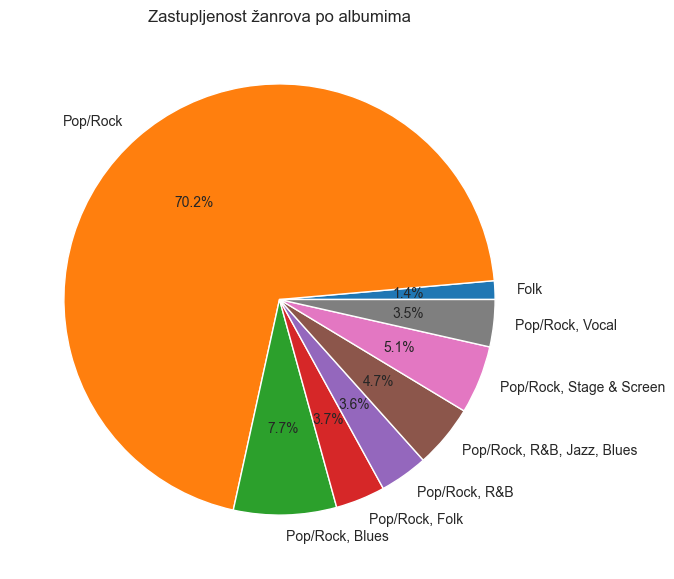

In [41]:
_,aks = plt.subplots(figsize=(9,7))
aks.pie(an3.values,labels=an3.index,autopct='%1.1f%%')
aks.set_title('Zastupljenost žanrova po albumima')
plt.show()

#### Učitaćemo novi dataset i nakon kratkog sređivanja (prebacivanje kolone koja se odnosi na profit u numerički tip), izvršićemo sledeće filtriranje nad samim datasetom:
#### - od industrija pratićemo samo proizvodne grane privrede
#### - pratićemo privredna kretanja od 2017 do 2023.
#### - uzećemo u obzir samo one zapise o profitu koji se odnose na milione dolara.

In [162]:
nz = pd.read_csv('../data/nzbiz.csv')
nz['Value'] = pd.to_numeric(nz['Value'],errors="coerce")
nz.dropna(subset='Value', inplace=True)
nz = nz.loc[nz['Industry_name_NZSIOC'].str.contains('Manuf') & nz['Units'].str.contains('millions') & (nz['Year']>2016),]

#### Izvršićemo grupisanje po godini i privrednoj grani, nakon čega ćemo odraditi sumu vrednosti po ove dve kategorije.

In [155]:
pfpogi = nz.groupby(['Year','Industry_name_NZSIOC'])['Value'].sum()
pfpogi

Year  Industry_name_NZSIOC                                 
2017  Basic Chemical and Basic Polymer Manufacturing             3516.0
      Basic Chemical and Chemical Product Manufacturing          4903.0
      Beverage and Tobacco Product Manufacturing                 5316.0
      Clothing, Knitted Products and Footwear Manufacturing      3773.0
      Electronic and Electrical Equipment Manufacturing          4198.0
                                                                 ...   
2023  Pulp, Paper and Converted Paper Product Manufacturing     65224.0
      Textile and Leather Manufacturing                         14261.0
      Textile, Leather, Clothing and Footwear Manufacturing     18486.0
      Transport Equipment Manufacturing                         63146.0
      Wood Product Manufacturing                               105246.0
Name: Value, Length: 168, dtype: float64

#### Kao rezultat dobili smo pandas seriju (instancu klase `Series`) sa dva indeksa: Year i Industry name

In [163]:
pfpogi.info()

<class 'pandas.core.series.Series'>
MultiIndex: 168 entries, (np.int64(2017), 'Basic Chemical and Basic Polymer Manufacturing') to (np.int64(2023), 'Wood Product Manufacturing')
Series name: Value
Non-Null Count  Dtype  
--------------  -----  
168 non-null    float64
dtypes: float64(1)
memory usage: 2.5+ KB


#### Datu strukturu možemo konvertovati u dataframe primenom `unstack` metode. Indeksi za godine će postati indeksi redova, a indeksi za industrije će postati kolone.

In [157]:
nz2 = pfpogi.unstack()
nz2

Industry_name_NZSIOC,Basic Chemical and Basic Polymer Manufacturing,Basic Chemical and Chemical Product Manufacturing,Beverage and Tobacco Product Manufacturing,"Clothing, Knitted Products and Footwear Manufacturing",Electronic and Electrical Equipment Manufacturing,Fabricated Metal Product Manufacturing,Fertiliser and Pesticide Manufacturing,Food Product Manufacturing,Furniture Manufacturing,Furniture and Other Manufacturing,...,Other Manufacturing,Petroleum and Coal Product Manufacturing,"Pharmaceutical, Cleaning and Other Chemical Manufacturing",Polymer Product and Rubber Product Manufacturing,Primary Metal and Metal Product Manufacturing,"Pulp, Paper and Converted Paper Product Manufacturing",Textile and Leather Manufacturing,"Textile, Leather, Clothing and Footwear Manufacturing",Transport Equipment Manufacturing,Wood Product Manufacturing
Year,,,,,,,,,,,,,,,,,,,,,
2017,3516.0,4903.0,5316.0,3773.0,4198.0,9916.0,2902.0,1576.0,4576.0,4023.0,...,4931.0,5960.0,6167.0,9874.0,6360.0,5590.0,4503.0,4851.0,8592.0,8542.0
2018,4818.0,5336.0,5594.0,3341.0,4553.0,10846.0,3043.0,2156.0,4714.0,4054.0,...,4828.0,1896.0,5638.0,9242.0,8210.0,6348.0,3903.0,5063.0,9686.0,7128.0
2019,5142.0,4814.0,5816.0,3398.0,4846.0,11636.0,3386.0,2380.0,4829.0,4273.0,...,5269.0,3208.0,5178.0,9356.0,8850.0,4400.0,3902.0,5057.0,8256.0,8158.0
2020,15771.0,49990.0,143376.0,3341.0,37535.0,95556.0,13991.0,343995.0,9099.0,14719.0,...,5620.0,163114.0,17985.0,63778.0,52588.0,65650.0,12154.0,15497.0,59544.0,82224.0
2021,14211.0,48504.0,136072.0,3239.0,45284.0,94276.0,15129.0,352618.0,9486.0,16124.0,...,6634.0,134652.0,18847.0,64194.0,47706.0,58204.0,11728.0,15045.0,52186.0,88458.0
2022,4219.0,56024.0,146134.0,3986.0,50306.0,110082.0,5431.0,391623.0,10318.0,18236.0,...,7914.0,164322.0,19195.0,68260.0,58424.0,61448.0,13484.0,17467.0,56494.0,100174.0
2023,13566.0,58207.0,160216.0,4224.0,53513.0,123274.0,14791.0,409474.0,10930.0,19911.0,...,8983.0,2302.0,21533.0,73768.0,63398.0,65224.0,14261.0,18486.0,63146.0,105246.0


#### Za prikaz ovakvog dataseta koristićemo heatmap-u. Koristićemu funkciju imshow za generisanje heatmap-e. Pored same heatmap-e kreiraćemo i skalu boja, tzv. colorbar, na osnovu koje ćemo prikazati način preslikavanja vrednosti u boje.

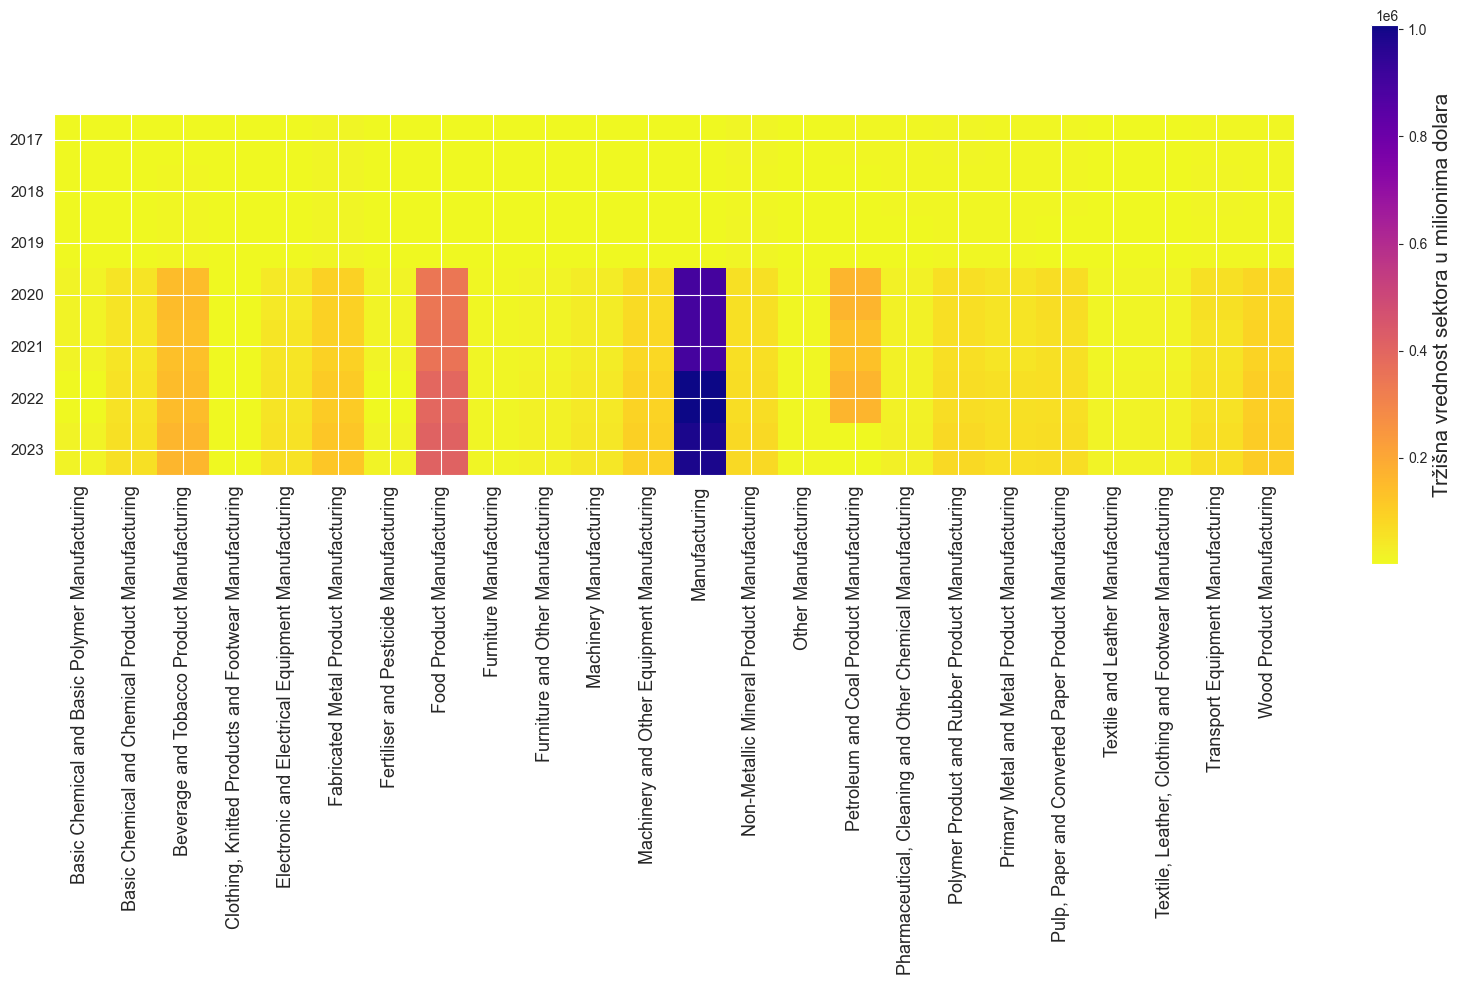

In [169]:
_, ax = plt.subplots(figsize=(20,7))
im = ax.imshow(nz2, cmap='plasma_r')

cbar = ax.figure.colorbar(im, ax = ax)
cbar.set_label("Tržišna vrednost sektora u milionima dolara", fontsize=15)

x_ticks = nz2.columns.tolist()
y_ticks = nz2.index.tolist()

ax.set_xticks(range(len(x_ticks)), labels = x_ticks)
ax.tick_params(axis='x', labelrotation=90, labelsize=13)
ax.set_yticks(range(len(y_ticks)), labels = y_ticks)
ax.tick_params(axis='y', labelsize=11)
plt.show()

#### Biblioteka `seaborn` nudi vizuelizaciju rasprostranjenosti NaN vrednosti u datasetu. Importovaćemo dataset koji sadrži nedostajuće vrednosti i demonstrirati ovu funkcionalnost. 

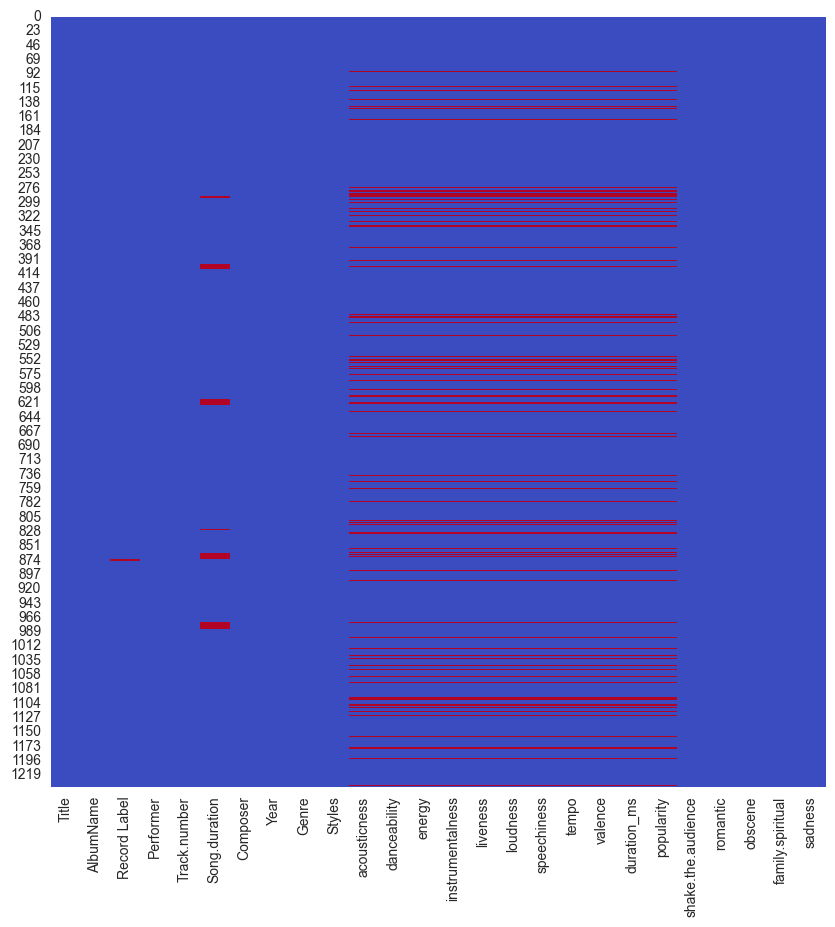

In [171]:
nadf = pd.read_csv('../data/brit.csv')
plt.figure(figsize=(10,10))
sb.heatmap(nadf.isna(), cbar=False, cmap='coolwarm')
plt.show()